# Applying fuzzy clustering to new dataset

In [1]:
import math
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## import ExtractRulesQPSO class
import sys, os
sys.path.append(os.getcwd() + '/scripts')

from importlib import reload
import ExtractRulesQPSO
reload(ExtractRulesQPSO)

import FuzzyClustering
reload(FuzzyClustering)

from ExtractRulesQPSO import ExtractRulesQPSO
from FuzzyClustering import FuzzyClustering
from FuzzyRule import FuzzyRule

In [2]:
df = pd.read_csv('./data/data_extraction.csv', header=1)
df.head()

,x,y,x.1,y.1,x.2,y.2
0,-1.513584,2.021725,-1.407596,-0.688274,2.236173,2.033473
1,-1.231298,2.011772,-1.159470,-0.651288,2.387670,1.929299
2,-1.247023,1.969969,-1.025865,-0.692831,2.306333,1.850828
3,-0.716827,2.007446,-1.539035,-0.751166,2.024913,1.819007
4,-0.831566,1.939361,-1.504118,-0.834656,2.194410,1.646978


In [3]:
df = df.dropna()

## Training and testing split

In [4]:
TEST_SIZE = 0.4

In [5]:
df_train, df_test = train_test_split(df, test_size=TEST_SIZE)

In [6]:
df_train.shape, df_test.shape

((358, 6), (239, 6))

In [7]:
df_train.head()

,x,y,x.1,y.1,x.2,y.2
354,3.834876,-0.477919,3.243023,-1.040373,10.115504,-0.367001
527,12.480695,-0.670475,14.740603,-1.758428,10.321491,0.569242
561,15.225684,-1.015566,0.267058,-0.889399,6.600724,1.165954
132,-1.715502,0.147587,0.263904,-0.960603,5.256950,1.991734
500,1.476953,-0.543414,12.651292,-1.025772,10.719869,0.663545


## Processing the data into three classes

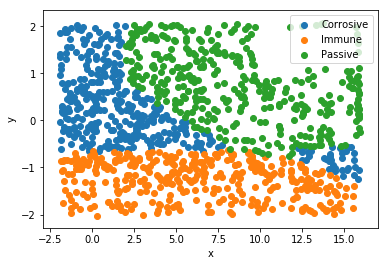

In [8]:
data_corrosive = []
for idx in range(df_train.shape[0]):
    tmp = np.array([df_train['x'].values[idx], df_train['y'].values[idx]])
    data_corrosive.append(tmp)

data_corrosive = np.array(data_corrosive)


data_immune = []
for idx in range(df_train.shape[0]):
    tmp = np.array([df_train['x.1'].values[idx], df_train['y.1'].values[idx]])
    data_immune.append(tmp)

data_immune = np.array(data_immune)

data_passive = []
for idx in range(df_train.shape[0]):
    tmp = np.array([df_train['x.2'].values[idx], df_train['y.2'].values[idx]])
    data_passive.append(tmp)

data_passive = np.array(data_passive)


plt.scatter(data_corrosive[:,0], data_corrosive[:,1], label = 'Corrosive')
plt.scatter(data_immune[:,0], data_immune[:,1], label = 'Immune')
plt.scatter(data_passive[:,0], data_passive[:,1], label = 'Passive')
plt.xlabel('x')
plt.ylabel('y')
plt.legend();

## Applying the fuzzy clustering

In [9]:
fc_corrosive = FuzzyClustering(data_corrosive)
fc_immune = FuzzyClustering(data_immune)
fc_passive = FuzzyClustering(data_passive)

In [10]:
## finding centers
fc_corrosive.extractClusteringCenters()
centers_corrosive = fc_corrosive.getDenormalizedClusterCenters()

fc_immune.extractClusteringCenters()
centers_immune = fc_immune.getDenormalizedClusterCenters()

fc_passive.extractClusteringCenters()
centers_passive = fc_passive.getDenormalizedClusterCenters()

In [11]:
centers_corrosive, centers_immune, centers_passive

(array([[ 1.15605251,  0.1003662 ],
        [-0.04146091,  1.46438667],
        [14.12542624, -0.80567493]]), array([[ 5.28647386, -1.03171314],
        [12.39677062, -1.46142542],
        [ 2.47979506, -1.76818651],
        [-1.50411775, -0.83465586]]), array([[ 5.78714549,  0.96877383],
        [12.53972506,  0.18461917],
        [ 3.41411921,  2.04074577],
        [11.76157311,  1.98216867]]))

In [12]:
centers_corrosive_df = pd.DataFrame(centers_corrosive)
num_rules_corrosive = len(centers_corrosive)
centers_corrosive_df.columns = ['x' + str(i + 1) for i in range(len(centers_corrosive[0]))]
centers_corrosive_df['class_label'] = 'Corrosive'

centers_immune_df = pd.DataFrame(centers_immune)
num_rules_immune = len(centers_immune)
centers_immune_df.columns = ['x' + str(i + 1) for i in range(len(centers_immune[0]))]
centers_immune_df['class_label'] = 'Immune'

centers_passive_df = pd.DataFrame(centers_passive)
num_rules_passive = len(centers_passive)
centers_passive_df.columns = ['x' + str(i + 1) for i in range(len(centers_passive[0]))]
centers_passive_df['class_label'] = 'Passive'

In [13]:
all_class_centers = []
all_class_centers.append(centers_corrosive)
all_class_centers.append(centers_immune)
all_class_centers.append(centers_passive)

all_class_centers

[array([[ 1.15605251,  0.1003662 ],
        [-0.04146091,  1.46438667],
        [14.12542624, -0.80567493]]), array([[ 5.28647386, -1.03171314],
        [12.39677062, -1.46142542],
        [ 2.47979506, -1.76818651],
        [-1.50411775, -0.83465586]]), array([[ 5.78714549,  0.96877383],
        [12.53972506,  0.18461917],
        [ 3.41411921,  2.04074577],
        [11.76157311,  1.98216867]])]

## Plotting clustering results

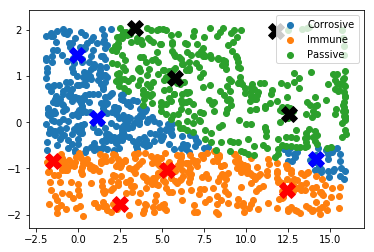

In [14]:
plt.scatter(data_corrosive[:,0], data_corrosive[:,1], label = 'Corrosive')
plt.scatter(data_immune[:,0], data_immune[:,1], label = 'Immune')
plt.scatter(data_passive[:,0], data_passive[:,1], label = 'Passive')

## Add centers of Corrosive
for cs in centers_corrosive:
    plt.scatter(cs[0], cs[1], marker = 'X', color = 'blue', s = 250)

## Add centers of Immune
for cs in centers_immune:
    plt.scatter(cs[0], cs[1], marker = 'X', color = 'red', s = 250)
    
## Add centers of Passive
for cs in centers_passive:
    plt.scatter(cs[0], cs[1], marker = 'X', color = 'black', s = 250)

plt.legend();

## QPSO

In [15]:
qpso = ExtractRulesQPSO(20, 50, 2 * (len(centers_corrosive) + len(centers_immune) + len(centers_passive)))

In [16]:
qpso.solver([centers_corrosive, centers_immune, centers_passive], 
            [data_corrosive, data_immune, data_passive])

In [17]:
qpso.best_particle

array([ 1.69651206, -0.65180817,  1.9980191 ,  1.29189868,  1.43759493,
        0.04783532,  2.91821208,  0.47363888,  2.91385714,  0.48243306,
        2.57079852,  0.61912522,  2.55317542,  0.16960291,  1.30060333,
        0.70885851,  2.91411032, -0.58802821,  0.67878256,  1.2823932 ,
        2.45915127,  1.52046275])

In [18]:
tuned_stds = ExtractRulesQPSO._arrangeStds(qpso.best_particle, all_class_centers)
stds_corrosive, stds_immune, stds_passive = tuned_stds
tuned_stds

[array([[ 1.69651206, -0.65180817],
        [ 1.9980191 ,  1.29189868],
        [ 1.43759493,  0.04783532]]), array([[2.91821208, 0.47363888],
        [2.91385714, 0.48243306],
        [2.57079852, 0.61912522],
        [2.55317542, 0.16960291]]), array([[ 1.30060333,  0.70885851],
        [ 2.91411032, -0.58802821],
        [ 0.67878256,  1.2823932 ],
        [ 2.45915127,  1.52046275]])]

In [19]:
stds_passive

array([[ 1.30060333,  0.70885851],
       [ 2.91411032, -0.58802821],
       [ 0.67878256,  1.2823932 ],
       [ 2.45915127,  1.52046275]])

## Showing rules

/Users/Minshen/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<Figure size 432x288 with 0 Axes>

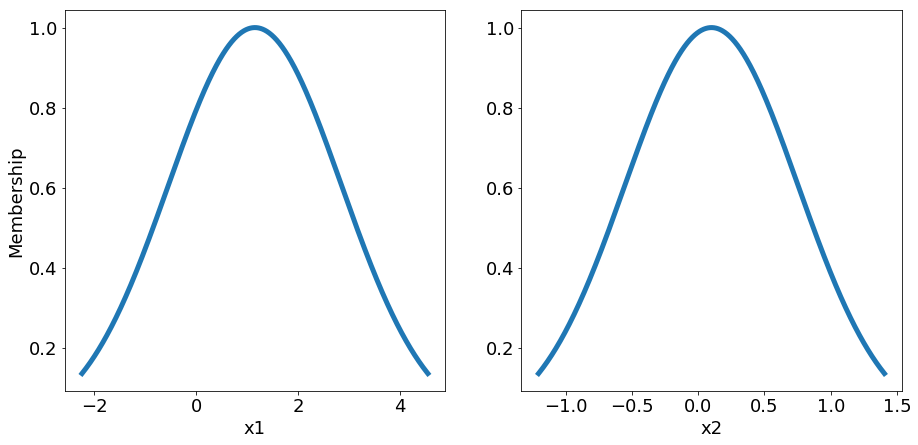

<Figure size 432x288 with 0 Axes>

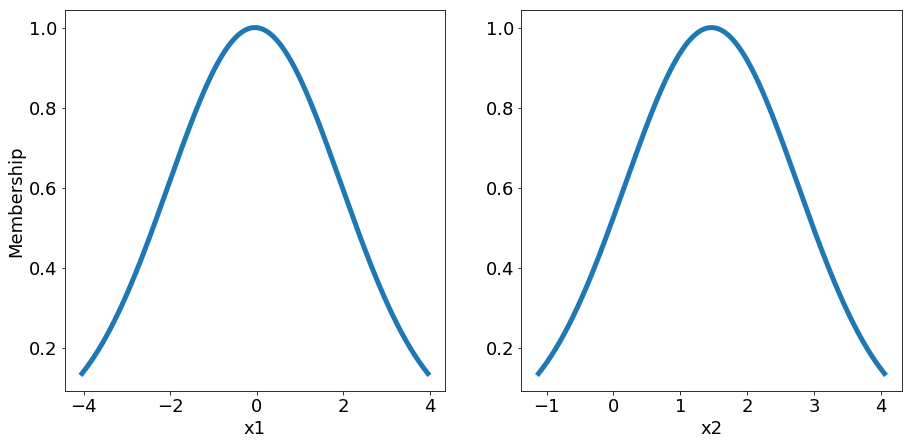

<Figure size 432x288 with 0 Axes>

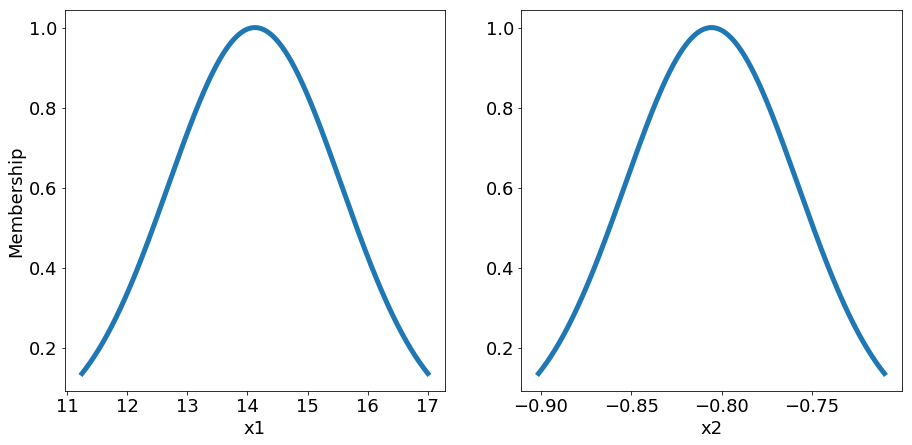

<Figure size 432x288 with 0 Axes>

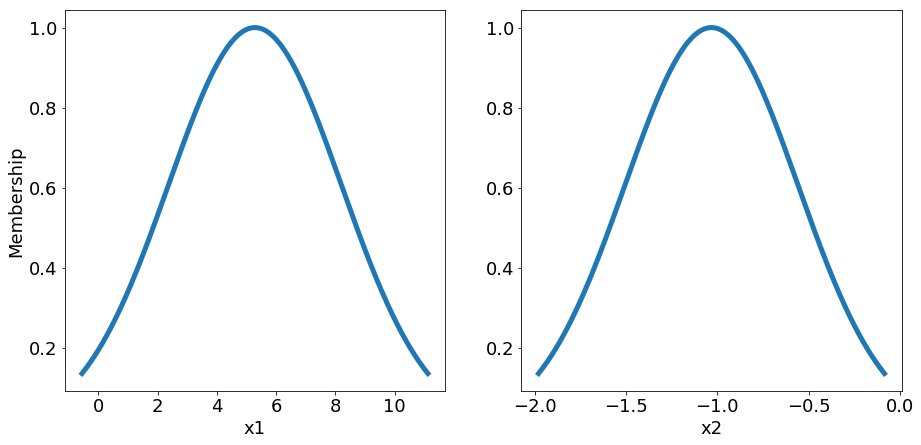

<Figure size 432x288 with 0 Axes>

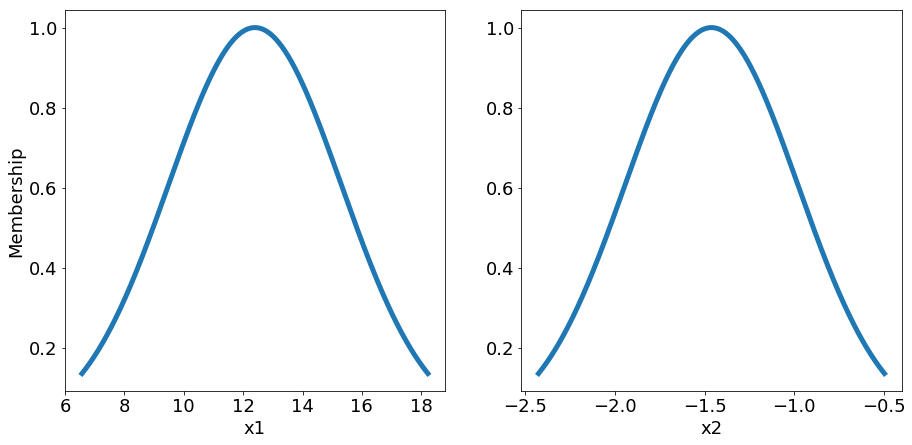

<Figure size 432x288 with 0 Axes>

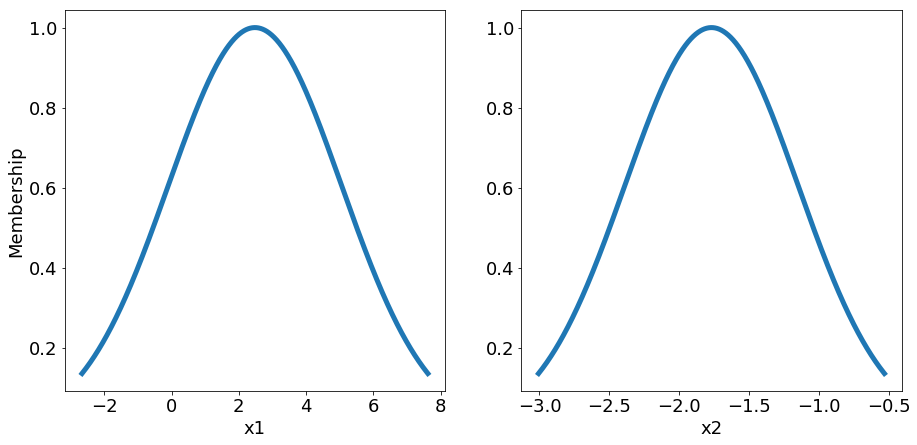

<Figure size 432x288 with 0 Axes>

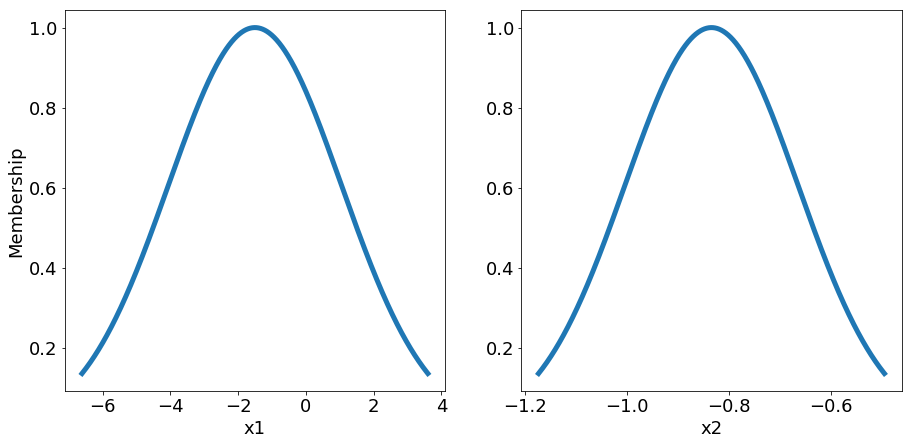

<Figure size 432x288 with 0 Axes>

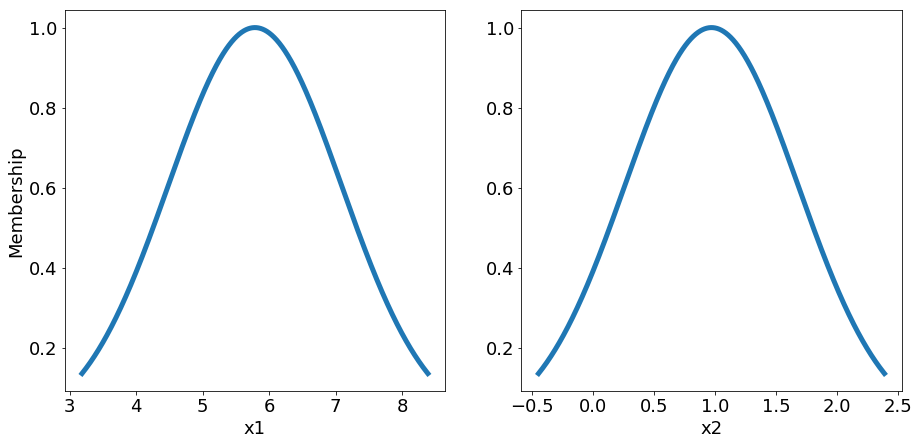

<Figure size 432x288 with 0 Axes>

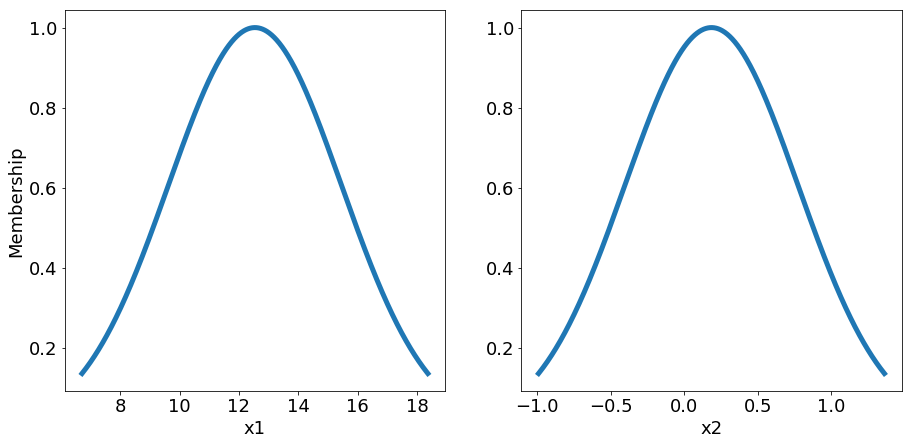

<Figure size 432x288 with 0 Axes>

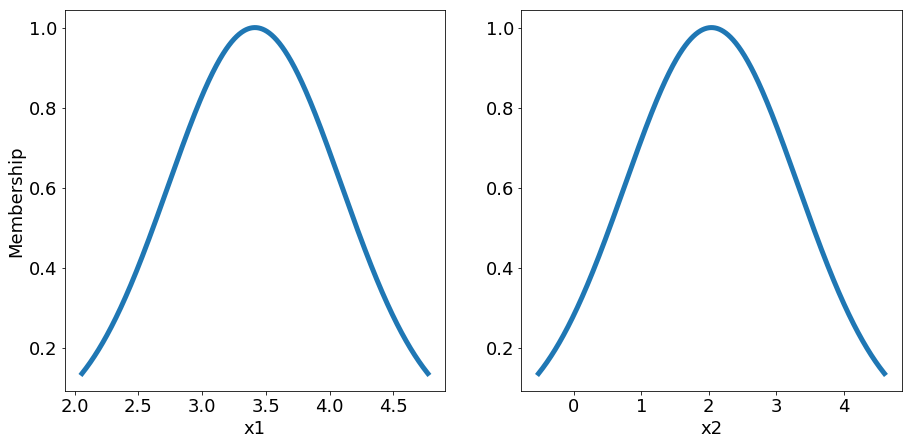

<Figure size 432x288 with 0 Axes>

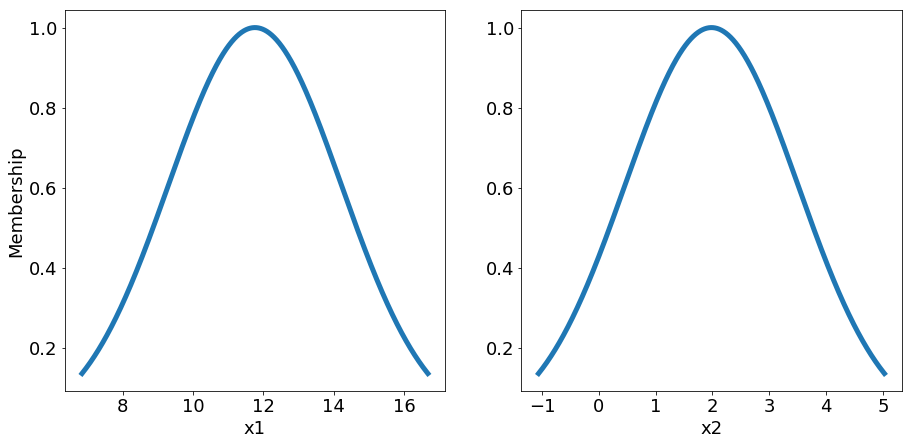

In [20]:
class_labels = ['Corrosive', 'Immune', 'Passive']

for all_centers, all_stds, class_label in zip(all_class_centers, tuned_stds, class_labels):
    # iterate through all classes
    
    for centers, stds in zip(all_centers, all_stds):
        # iterate through all rules
        rule = FuzzyRule(centers, stds, class_label)
        rule.plotRule()

## Testing results

In [21]:
xs = []
ys = []
testing_labels = []

test_data_corrosive = []
for idx in range(df_test.shape[0]):
    tmp = np.array([df_test['x'].values[idx], df_test['y'].values[idx]])
    test_data_corrosive.append(tmp)

test_data_corrosive = np.array(test_data_corrosive)

test_data_immune = []
for idx in range(df_test.shape[0]):
    tmp = np.array([df_test['x.1'].values[idx], df_test['y.1'].values[idx]])
    test_data_immune.append(tmp)

test_data_immune = np.array(test_data_immune)

test_data_passive = []
for idx in range(df_test.shape[0]):
    tmp = np.array([df_test['x.2'].values[idx], df_test['y.2'].values[idx]])
    test_data_passive.append(tmp)

test_data_passive = np.array(test_data_passive)

In [22]:
for data_point in test_data_corrosive:
    xs.append(data_point[0])
    ys.append(data_point[1])
    testing_labels.append(
        ExtractRulesQPSO._returnClassWithMaxMF(all_class_centers, tuned_stds, data_point, class_labels)
    )

    
for data_point in test_data_immune:
    xs.append(data_point[0])
    ys.append(data_point[1])
    testing_labels.append(
        ExtractRulesQPSO._returnClassWithMaxMF(all_class_centers, tuned_stds, data_point, class_labels)
    )
    
for data_point in test_data_passive:
    xs.append(data_point[0])
    ys.append(data_point[1])
    testing_labels.append(
        ExtractRulesQPSO._returnClassWithMaxMF(all_class_centers, tuned_stds, data_point, class_labels)
    )

In [23]:
testing_data_points_df = pd.DataFrame(data={
    'x': xs,
    'y': ys,
    'label': testing_labels
})

testing_data_points_df.head()

,x,y,label
0,1.323248,0.188158,Corrosive
1,0.324839,0.027085,Corrosive
2,0.297620,0.316152,Corrosive
3,1.764358,1.171921,Corrosive
4,-0.294736,0.447710,Corrosive


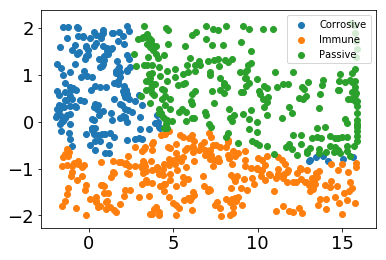

In [24]:
plt.scatter(
    testing_data_points_df[testing_data_points_df['label'] == 'Corrosive']['x'], 
    testing_data_points_df[testing_data_points_df['label'] == 'Corrosive'].y,
    label='Corrosive'
)

plt.scatter(
    testing_data_points_df[testing_data_points_df['label'] == 'Immune']['x'],
    testing_data_points_df[testing_data_points_df['label'] == 'Immune'].y,
    label='Immune'
)

plt.scatter(
    testing_data_points_df[testing_data_points_df['label'] == 'Passive'].x, 
    testing_data_points_df[testing_data_points_df['label'] == 'Passive'].y,
    label='Passive'
)

plt.legend()

## De-bugging

In [25]:
testing_data_points_df[(testing_data_points_df.x<0) & (testing_data_points_df.y<-1.9)]

,x,y,label
345,-0.189819,-1.987436,Immune


In [26]:
test_data_point = [-0.189819, -1.987436]

In [27]:
print('Corrosive MF')
print(
    ExtractRulesQPSO._maxMembershipFromAllRules(
        centers_corrosive, stds_corrosive, test_data_point
    )
)

print('Immune MF')
print(
    ExtractRulesQPSO._maxMembershipFromAllRules(
        centers_immune, stds_immune, test_data_point
    )
)

print('Passive MF')

print(
    ExtractRulesQPSO._maxMembershipFromAllRules(
        centers_passive, stds_passive, test_data_point
    )
)

Corrosive MF
0.0280917711156265
Immune MF
0.5477810134383115
Passive MF
2.4604763829185565e-07


### Single rules

In [28]:
centers_corrosive, stds_corrosive

(array([[ 1.15605251,  0.1003662 ],
        [-0.04146091,  1.46438667],
        [14.12542624, -0.80567493]]), array([[ 1.69651206, -0.65180817],
        [ 1.9980191 ,  1.29189868],
        [ 1.43759493,  0.04783532]]))

In [29]:
(
    ExtractRulesQPSO._expMembership(test_data_point[0], 1.32324787, -4.98719319) * 
    ExtractRulesQPSO._expMembership(test_data_point[1], 0.18815782, -0.53380531)
),(
    ExtractRulesQPSO._expMembership(test_data_point[0], -0.07605351, -0.56937683) * 
    ExtractRulesQPSO._expMembership(test_data_point[1], 1.53221157, 53.29336566)
), (
    
)

(0.000236063531333359, 0.9781010856676391, ())